# Comparaison entre Monte-Carlo et la propagation des variances

On se propose de comparer les résultats obtenus sur des exemples pour la somme, le produit et l'utilisation d'une fonction. On rappelle qu'il ne s'agit pas d'une démonstration mais de montrer qu'on trouve bien les mêmes résultats (ou pas).

## Cas d'une somme
On prend deux grandeurs $X_1$ et $X_2$ dont les incertitudes-type estimées sont respectivement $u_1$ et $u_2$. On cherche l'incertitude-type de $Y = X_1 + X_2$.

__Attention :__ Pour une distribution uniforme, on travaille en général avec la demi-largeur $t$ __qui n'est pas l'incertitude-type de la distribution.__ L'incertitude_type d'une distribution uniforme est $\frac{t}{\sqrt{3}}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

X1_mes = 1  # Résultat de mesurage pour X1
X2_mes = 2  # Résultat de mesurage pour X2
X1_u = 0.05  # Incertitude-type pour X1
X2_u = 0.08  # Incertitude-type pour X2
X1_t = X1_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X1
X2_t = X2_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X2

# Valeur mesurée pour Y
Y_mes = X1_mes + X2_mes
print("Résultat de mesurage : ", Y_mes)

# Propagation des variances
Y_uv = np.sqrt(X1_u ** 2 + X2_u ** 2)
print("u(Y) par propagation des variances ", Y_uv)

# Simulation de Monte-Carlo (cas uniforme)
N = 1000000
X1_sim = X1_mes + rd.uniform(-X1_t, X1_t, N)
X2_sim = X2_mes + rd.uniform(-X2_t, X2_t, N)
Y_sim = X1_sim + X2_sim
Y_um1 = np.std(Y_sim, ddof=1)
print("u(Y) par Monte-Carlo (cas uniforme) ", Y_um1)

Résultat de mesurage :  3
u(Y) par propagation des variances  0.09433981132056604
u(Y) par Monte-Carlo (cas uniforme)  0.094298825171241


_On peut considérer que sur ce cas, la propagation des variances donne bien un résultat correct._

## Cas d'un produit
On prend deux grandeurs $X_1$ et $X_2$ dont les incertitudes-type estimées sont respectivement $u_1$ et $u_2$. On cherche l'incertitude-type de $Y = X_1 \times X_2$.

__Attention :__ Pour une distribution uniforme, on travaille en général avec la demi-largeur $t$ __qui n'est pas l'incertitude-type de la distribution.__ L'incertitude_type d'une distribution uniforme est $\frac{t}{\sqrt{3}}$.

In [23]:
X1_mes = 1  # Résultat de mesurage pour X1
X2_mes = 2  # Résultat de mesurage pour X2
X1_u = 0.05  # Incertitude-type pour X1
X2_u = 0.08  # Incertitude-type pour X2
X1_t = X1_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X1
X2_t = X2_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X2

# Valeur mesurée pour Y
Y_mes = X1_mes * X2_mes
print("Résultat de mesurage : ", Y_mes)

# Propagation des variances
Y_uv = Y_mes * np.sqrt((X1_u / X1_mes) ** 2 + (X2_u / X2_mes) ** 2)
print("u(Y) par propagation des variances ", Y_uv)

# Simulation de Monte-Carlo (cas uniforme)
N = 1000000
X1_sim = X1_mes + rd.uniform(-X1_t, X1_t, N)
X2_sim = X2_mes + rd.uniform(-X2_t, X2_t, N)
Y_sim = X1_sim * X2_sim
Y_um1 = np.std(Y_sim, ddof=1)
print("u(Y) par Monte-Carlo (cas uniforme) ", Y_um1)

Résultat de mesurage :  2
u(Y) par propagation des variances  0.12806248474865697
u(Y) par Monte-Carlo (cas uniforme)  0.12813218303681448


_On peut considérer que sur ce cas, la propagation des variances donne bien un résultat correct._

## Cas d'une combinaison
On prend deux grandeurs $X_1$ et $X_2$ dont les incertitudes-type estimées sont respectivement $u_1$ et $u_2$. On cherche l'incertitude-type de $Y = {X_1 X_2 \over X_2 + X_1}$.

__Attention :__ Pour une distribution uniforme, on travaille en général avec la demi-largeur $t$ __qui n'est pas l'incertitude-type de la distribution.__ L'incertitude_type d'une distribution uniforme est $\frac{t}{\sqrt{3}}$.

Explication sur l'expression de l'incertitude :

\begin{align}
Y &= \frac{1}{{1 \over X1} + {1 \over X2}}\\
u({1\over X1}) &= {u(X1)\over X1^2}\\
u({1\over X2}) &= {u(X2)\over X2^2}\\
u({1\over X1} + {1\over X2}) &= \sqrt{u({1\over X1})^2 + u({1\over X2})^2}\\
u(Y) &= Y {u({1\over X1} + {1\over X2}) \over \frac{1}{{1 \over X1} + {1 \over X2}}}\\
u(Y) &= Y^2 \sqrt{\left ({u(X1)\over X1^2}\right )^2 + \left ({u(X2)\over X2^2}\right )^2}
\end{align}

Résultat de mesurage :  0.6666666666666666
u(Y) par propagation des variances  0.023934065809486687
u(Y) par Monte-Carlo (cas uniforme)  0.02392971901307005


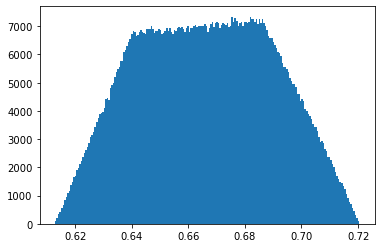

In [43]:
X1_mes = 1  # Résultat de mesurage pour X1
X2_mes = 2  # Résultat de mesurage pour X2
X1_u = 0.05  # Incertitude-type pour X1
X2_u = 0.08  # Incertitude-type pour X2
X1_t = X1_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X1
X2_t = X2_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X2

# Valeur mesurée pour Y
Y_mes = (X1_mes * X2_mes) / (X1_mes + X2_mes)
print("Résultat de mesurage : ", Y_mes)

# Propagation des variances
Y_uv = Y_mes ** 2 * np.sqrt((X1_u / X1_mes ** 2) ** 2 + (X2_u / X2_mes ** 2) ** 2)
print("u(Y) par propagation des variances ", Y_uv)

# Simulation de Monte-Carlo (cas uniforme)
N = 1000000
X1_sim = X1_mes + rd.uniform(-X1_t, X1_t, N)
X2_sim = X2_mes + rd.uniform(-X2_t, X2_t, N)
Y_sim = (X1_sim * X2_sim) / (X1_sim + X2_sim)
Y_um1 = np.std(Y_sim, ddof=1)
print("u(Y) par Monte-Carlo (cas uniforme) ", Y_um1)

#plt.hist(prod_sim, bins='rice')
plt.hist(Y_sim, bins='rice')
plt.show()

_On peut considérer que sur ce cas, la propagation des variances donne bien un résultat correct._

## Cas d'une fonction
On prend une grandeur $X_1$ l'incertitude-type estimée est respectivement $u_1$. On cherche l'incertitude-type de $Y = f(X_1) $.


__Attention :__ Pour une distribution uniforme, on travaille en général avec la demi-largeur $t$ __qui n'est pas l'incertitude-type de la distribution.__ L'incertitude_type d'une distribution uniforme est $\frac{t}{\sqrt{3}}$.

On prendra deux fonctions :
* $f(x) = x^2$
* $f(x) = \cos x$

### Cas du carré

In [4]:
X1_mes = 1  # Résultat de mesurage pour X1
X1_u = 0.05  # Incertitude-type pour X1
X1_t = X1_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X1

# Valeur mesurée pour Y
Y_mes = X1_mes ** 2
print("Résultat de mesurage : ", Y_mes)

# Propagation des variances
Y_uv = 2 * X1_mes * X1_u
print("u(Y) par propagation des variances ", Y_uv)

# Simulation de Monte-Carlo (cas uniforme)
N = 1000000
X1_sim = X1_mes + rd.uniform(-X1_t, X1_t, N)
Y_sim = X1_sim ** 2
Y_um1 = np.std(Y_sim, ddof=1)
print("u(Y) par Monte-Carlo (cas uniforme) ", Y_um1)

Résultat de mesurage :  1
u(Y) par propagation des variances  0.1
u(Y) par Monte-Carlo (cas uniforme)  0.09997997320680332


_On peut considérer que sur ce cas, la propagation des variances donne bien un résultat correct._

### Cas du cosinus

In [5]:
X1_mes = 0.01  # Résultat de mesurage pour X1
X1_u = 0.05  # Incertitude-type pour X1
X1_t = X1_u * np.sqrt(3)  # Demi-largeur de la distribution uniforme pour X1

# Valeur mesurée pour Y
Y_mes = np.cos(X1_mes)
print("Résultat de mesurage : ", Y_mes)

# Propagation des variances
Y_uv = np.sin(X1_u) * X1_u
print("u(Y) par propagation des variances ", Y_uv)

# Simulation de Monte-Carlo (cas uniforme)
N = 1000000
X1_sim = X1_mes + rd.uniform(-X1_t, X1_t, N)
Y_sim = np.cos(X1_sim)
Y_um1 = np.std(Y_sim, ddof=1)
print("u(Y) par Monte-Carlo (cas uniforme) ", Y_um1)

Résultat de mesurage :  0.9999500004166653
u(Y) par propagation des variances  0.002498958463533917
u(Y) par Monte-Carlo (cas uniforme)  0.0012258000061342346


Et là, on observe un grand écart. La raison est que la fonction n'est pas du tout linéaire et qu'on est proche d'un extremum : il y a un changement de pente.

Comme expliqué précédemment, la relation donnée vient d'une approximatino de la fonction par sa tangente. Autour du maximum d'un cosinus, ce n'est pas valable.

```{important}
On retiendra que le cas $Y = f(X)$ pose souvent des problèmes (quand la fonction n'est pas linéaire). Il est souvent préférable d'utiliser Monte-Carlo dans ce cas là.
```